In [1]:
!ls

Math-Lab.ipynb	python-jupyter-colab.png  ref.ipynb


<img src=https://drive.google.com/file/d/1wjKeozhK3bSM609xBUgiGX7GwuNhb9sH/view?usp=sharing>

<img src=python-jupyter-colab.png>

# Basic Interactive Widgets

As well as supporting interactive content editing and code execution, Jupyter notebooks also allow the embedding of interactive widgets that can be used to develop simple interactive user interfaces within a notebook.

In Python notebooks, the `ipywidgets` package provides all we need to get started.

## `ipywidgets`

In [1]:
#Enable inline charts
%matplotlib inline

#Import ipywidget functions
from ipywidgets import interact

In [2]:
import numpy as np
import pandas as pd

Let's create a simple sinusoidal dataset:

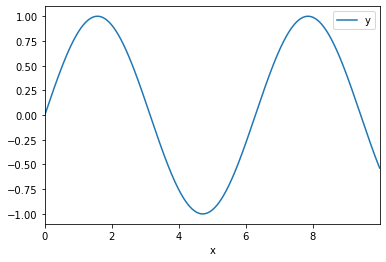

In [3]:
df=pd.DataFrame({'x':np.arange(10, step=0.01)})
df['y']=np.sin(df['x'])
df.plot(x='x',y='y');

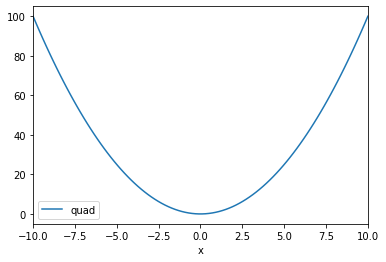

In [36]:
x = np.linspace(-10, 10, 100)
df=pd.DataFrame({'x':x})
df['quad']=df['x']*df['x'] #  + 2.0*df['x'] + 1.
df.plot(x='x',y='quad')

In [34]:
df

,x,quad
0,-10.000000,81.000000
1,-9.797980,77.404449
2,-9.595960,73.890521
3,-9.393939,70.458219
4,-9.191919,67.107540
5,-8.989899,63.838486
6,-8.787879,60.651056
7,-8.585859,57.545250
8,-8.383838,54.521069
9,-8.181818,51.578512


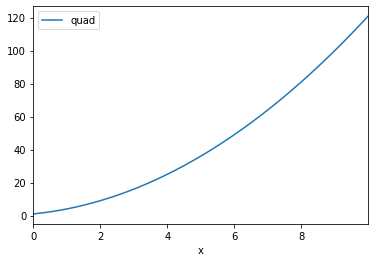

In [28]:
df=pd.DataFrame({'x':np.arange(10, step=0.01)})
df['quad']=df['x']**2 + 2*df['x'] + 1
df.plot(x='x',y='quad')

In [25]:
df.head(10)

,x,sin,cos
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999200
5,0.05,0.049979,0.998750
6,0.06,0.059964,0.998201
7,0.07,0.069943,0.997551
8,0.08,0.079915,0.996802
9,0.09,0.089879,0.995953


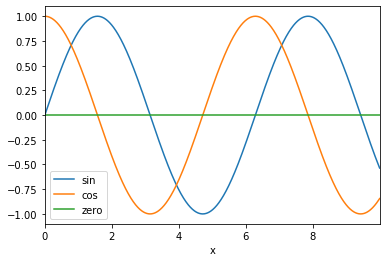

In [27]:
df=pd.DataFrame({'x':np.arange(10, step=0.01)})
df['sin']=np.sin(df['x'])
df['cos']=np.cos(df['x'])
df['zero'] = np.zeros(1000)
df.plot(x='x',y=['sin','cos','zero'])


We can create a function to calculate a similar wave with a frequency parameter.

In [4]:
def sine_wave(f=1):
    df=pd.DataFrame({'x':np.arange(10, step=0.01)})
    df['y']=np.sin(f * df['x'])
    df.plot(x='x',y='y');

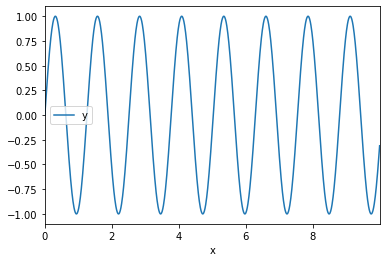

In [5]:
sine_wave(5)

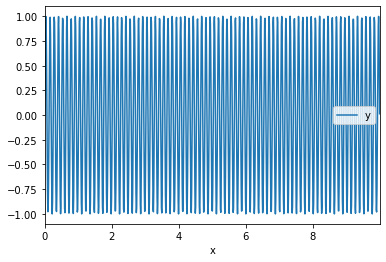

In [6]:
sine_wave(50)

If we "decorate" the sine wave function appropriately, we can automatically generate an interactive control to set the frequency value:

In [7]:
@interact(freq = 1)
def sine_wave(freq =1):
    ''' Plot a simple sine wave. '''
    df = pd.DataFrame({'x':np.arange(10, step=0.01)})
    df['y'] = np.sin(freq * df['x'])
    df.plot(x='x',y='y');

interactive(children=(IntSlider(value=1, description='freq', max=3, min=-1), Output()), _dom_classes=('widget-…

We can achieve more control over the slider if we need it, such as setting the upper and lower value limits and the step size.

We can also invoke other widget types. For example, if we pass a list of colour values, we can generate a drop down list to select the line colour. Or a boolean value for a checkbox.

In [11]:
@interact(freq = (1,20,1),
          dashed = False,
          col = ['red','blue', 'green']
          )
def sine_wave(freq, col, dashed):
    ''' Plot a simple sine wave using with specified style. '''
    df = pd.DataFrame({'x':np.arange(10, step=0.01)})
    df['y'] = np.sin(freq * df['x'])
    df.plot(x='x',y='y', color=col, style = '--' if dashed else '-');

interactive(children=(IntSlider(value=10, description='freq', max=20, min=1), Dropdown(description='col', opti…

In [17]:
#ish via https://github.com/jupyter-widgets/ipywidgets/issues/1582

from IPython.display import display
import numpy as np
from ipywidgets import interactive_output, FloatSlider, HBox, VBox
import matplotlib.pyplot as plt

def plot_oscillation(wavelength, magnitude, phase):
    x = np.linspace(-20, 20, 1000)
    plt.plot(x, magnitude*np.sin((x+phase)/(wavelength/(2*np.pi))))
    plt.ylim((-10,10))
    plt.show()
    
w = dict(wavelength = FloatSlider(2*np.pi, min=0.1, max=20, step=0.1, description='wavelength'),
         magnitude = FloatSlider(1, min=0.1, max=10, step=0.1, description='magnitude'),
         phase = FloatSlider(0, min=0, max=10, step=0.1, description='phase'))

#We can control elements of the layout
output = interactive_output(plot_oscillation, w)
box = HBox([VBox([*w.values()]), output])
display(box)

In [14]:
import ipywidgets

In [15]:
dir(ipywidgets)

['Accordion',
 'Audio',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'ButtonStyle',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'CoreWidget',
 'DOMWidget',
 'DatePicker',
 'Datetime',
 'Dropdown',
 'FloatLogSlider',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'GridBox',
 'HBox',
 'HTML',
 'HTMLMath',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Layout',
 'NumberFormat',
 'Output',
 'Password',
 'Play',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionRangeSlider',
 'SelectionSlider',
 'SliderStyle',
 'Style',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'ToggleButtonsStyle',
 'VBox',
 'Valid',
 'ValueWidget',
 'Video',
 'Widget',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__jupyter_widgets_base_version__',
 '__jupyter_widgets_controls_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__protocol_version__',
 '